<a href="https://colab.research.google.com/github/Lochana-Nelum/Teleproject/blob/main/TelcoProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
from google.colab import files
uploaded = files.upload()

import io
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check column names and data types
print("--- Data Info ---")
df.info()

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Check  summary of columns
print("\n--- Statistical Summary ---")
df.describe()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# 1. Drop the CustomerID column as it is an identifier and not a feature
df.drop('customerID', axis=1, inplace=True)

# 2. Convert Binary Categorical features to 0/1
# Replace 'No' with 0 and 'Yes' with 1 for the target variable 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Do the same for other relevant binary features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if df[col].dtype == 'object':
        # Assuming 'Yes'/'No' or 'Female'/'Male' structure where one is the positive class
        df[col] = df[col].replace({'Yes': 1, 'No': 0})
        # Handle 'Male'/'Female' for 'gender' if not done already, mapping it to 0/1
        if col == 'gender':
            df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# 3. One-Hot Encoding for multi-valued categorical features
# These columns have more than two unique values
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"Dataset shape after encoding: {df.shape}")
df.head()

Dataset shape after encoding: (7043, 6560)


/tmp/ipython-input-2950327125.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,0,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,0,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,0,0,2,1,1,53.85,1,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,0,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,2,1,1,70.70,1,False,...,False,False,False,False,False,False,False,False,False,False


TotalCharges already processed or name changed.


/tmp/ipython-input-959952260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


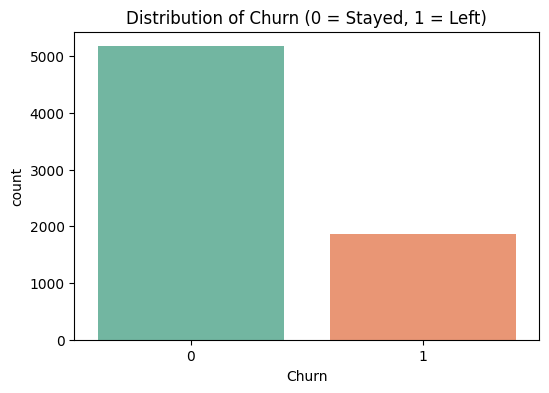

Preprocessing complete! We are ready to build the models.


In [8]:
# Cleaning and Visualization ---

# 1. Fix TotalCharges BEFORE we do any more encoding
if 'TotalCharges' in df.columns:
    # Convert text to numbers; empty spaces become NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    # Fill those NaN values with the median so the model doesn't fail
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
    print("Success: TotalCharges is now numeric.")
else:
    print("TotalCharges already processed or name changed.")

# 2. Visualization (Task 1(EDA))
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn (0 = Stayed, 1 = Left)')
plt.show()

# 3. Final Preprocessing (Task 2: Corpus Preparation)
# This splits our data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We scale the data so the Neural Network treats all numbers fairly
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete! We are ready to build the models.")

In [9]:
#Decision Tree and Neural Network ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42) # 'max_depth' keeps it simple
dt_model.fit(X_train, y_train) # Training
dt_preds = dt_model.predict(X_test) # Testing

# 2. Neural Network Model
# We use X_train_scaled because Neural Networks are sensitive to number sizes
nn_model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_preds = nn_model.predict(X_test_scaled)

# 3. Compare Results (Task 2: Experimental Results)
print("--- Decision Tree Accuracy ---")
print(f"{accuracy_score(y_test, dt_preds):.2%}")

print("\n--- Neural Network Accuracy ---")
print(f"{accuracy_score(y_test, nn_preds):.2%}")

--- Decision Tree Accuracy ---
80.77%

--- Neural Network Accuracy ---
77.50%



===== Decision Tree Results =====
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



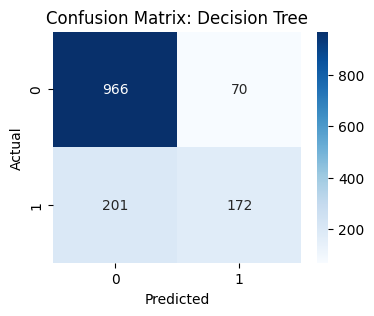


===== Neural Network Results =====
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1036
           1       0.68      0.29      0.41       373

    accuracy                           0.78      1409
   macro avg       0.73      0.62      0.63      1409
weighted avg       0.76      0.78      0.74      1409



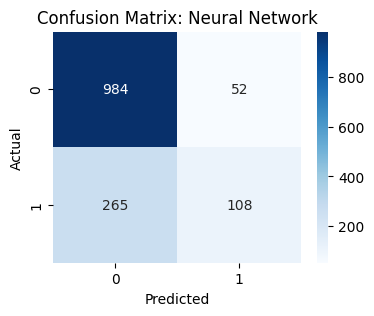

In [10]:
# Detailed Comparison ---
from sklearn.metrics import classification_report, confusion_matrix

# Function to show results clearly
def show_results(name, y_true, y_pred):
    print(f"\n===== {name} Results =====")
    print(classification_report(y_true, y_pred))

    # Let's visualize the "Confusion Matrix" (What the model got right vs wrong)
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# Run the comparison
show_results("Decision Tree", y_test, dt_preds)
show_results("Neural Network", y_test, nn_preds)